In [30]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [31]:
import sklearn

In [32]:
imdb=pd.read_csv("./BASE_DATA.csv")

In [33]:
imdb.head()

,movie_title,title_year,director_name,gross,budget,content_rating,country,duration,actor_1_facebook_likes,genres,f_adj_gross,adj_budget,dir_adj_av_gross,profit
0,Avatar,2009.0,James Cameron,760505847.0,237000000.0,3,USA,178.0,1000.0,Action|Adventure|Fantasy|Sci-Fi,8.507924e+08,2.651364e+08,4.541947e+08,1
1,Pirates of the Caribbean: At World's End,2007.0,Gore Verbinski,309404152.0,300000000.0,3,USA,169.0,40000.0,Action|Adventure|Fantasy,3.581561e+08,3.472702e+08,2.270651e+08,1
2,The Dark Knight Rises,2012.0,Christopher Nolan,448130642.0,250000000.0,3,USA,164.0,27000.0,Action|Thriller,4.684692e+08,2.613463e+08,2.520591e+08,1
3,John Carter,2012.0,Andrew Stanton,73058679.0,263700000.0,3,USA,132.0,640.0,Action|Adventure|Sci-Fi,7.637447e+07,2.756681e+08,2.742116e+08,0
4,Spider-Man 3,2007.0,Sam Raimi,336530303.0,258000000.0,3,USA,156.0,24000.0,Action|Adventure|Romance,3.895565e+08,2.986524e+08,2.218088e+08,1


In [34]:
#X=imdb.loc[:,['adj_budget','duration','dir_adj_av_gross']]
X=imdb.loc[:,['content_rating','adj_budget','duration','dir_adj_av_gross']]
y=imdb.loc[:,'profit'].values

In [35]:
#budg = imdb.loc[:,'adj_budget']
#gross = imdb.loc[:,'dir_adj_av_gross']
#duration = imdb.loc[:,'duration']

In [36]:
#budg_norm = (budg-budg.min())/(budg.max()-budg.min())
#gross_norm = (gross-gross.min())/(gross.max()-gross.min())
#dur_norm = (duration-duration.min())/(duration.max()-duration.min())

In [37]:
X.head()

,content_rating,adj_budget,duration,dir_adj_av_gross
0,3,2.651364e+08,178.0,4.541947e+08
1,3,3.472702e+08,169.0,2.270651e+08
2,3,2.613463e+08,164.0,2.520591e+08
3,3,2.756681e+08,132.0,2.742116e+08
4,3,2.986524e+08,156.0,2.218088e+08


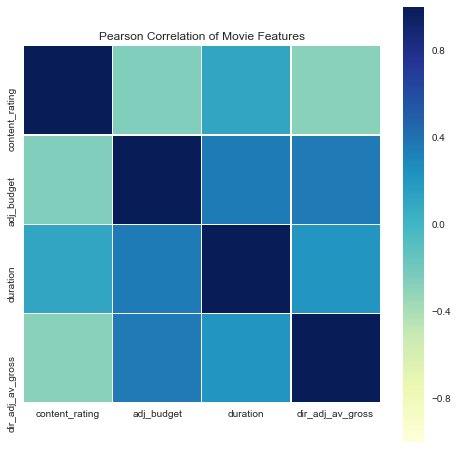

In [38]:
# Set up the matplotlib figure
%matplotlib inline
f, ax = plt.subplots(figsize=(8, 8))
plt.title('Pearson Correlation of Movie Features')
# Draw the heatmap using seaborn
sn.heatmap(X.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="YlGnBu", linecolor='white')

In [40]:
# Data Normalization
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)
X_std

array([[-0.21344238,  4.27449548,  3.08511155,  3.17158754],
       [-0.21344238,  5.91128964,  2.6797483 ,  1.23429723],
       [-0.21344238,  4.19896449,  2.45454649,  1.44748231],
       ..., 
       [-0.21344238, -1.00907173, -1.46396494, -0.69783974],
       [ 0.88170698, -1.00901034, -1.2838035 , -0.15557204],
       [-1.30859173, -1.00922112, -0.87844024, -0.66406877]])

In [42]:
#X['adj_budget']=budg_norm
#X['dir_adj_av_gross']=gross_norm

In [43]:
X.head()

,content_rating,adj_budget,duration,dir_adj_av_gross
0,3,2.651364e+08,178.0,4.541947e+08
1,3,3.472702e+08,169.0,2.270651e+08
2,3,2.613463e+08,164.0,2.520591e+08
3,3,2.756681e+08,132.0,2.742116e+08
4,3,2.986524e+08,156.0,2.218088e+08


In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [45]:
X.shape

(2940, 4)

In [46]:
X_new = SelectKBest(chi2, 2).fit_transform(X,y)

In [47]:
X_new.shape

(2940, 2)

In [48]:
#quick test to see what a model does with all the variables
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=8)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=8)

In [49]:
from sklearn.neighbors import KNeighborsClassifier

In [50]:
knn = KNeighborsClassifier(n_neighbors=300, algorithm='auto', metric='minkowski', p=2, weights='uniform')

In [51]:
profit_knn = knn.fit(X_train, y_train)

In [52]:
profit_knn.score(X_test,y_test)

0.68480725623582761

In [54]:
#check which features contribute to the variance
# Calculating Eigenvectors and eigenvalues of Cov matirx
import numpy as np
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [55]:
# Create a list of (eigenvalue, eigenvector) tuples
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort from high to low
eig_pairs.sort(key = lambda x: x[0], reverse= True)

# Calculation of Explained Variance from the eigenvalues
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

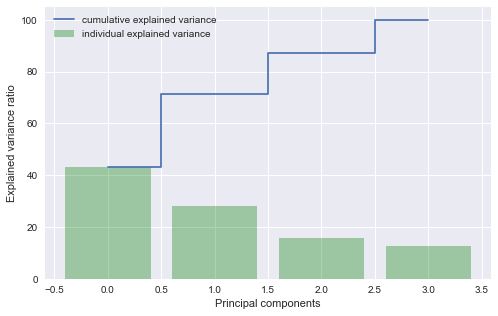

In [59]:
# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
plt.figure(figsize=(8, 5))
plt.bar(range(4), var_exp, alpha=0.3333, align='center', label='individual explained variance', color = 'g')
plt.step(range(4), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

In [60]:
y_pred = profit_knn.predict(X_test)

In [61]:
%matplotlib inline

In [62]:
import seaborn as sn

In [63]:
import matplotlib.pyplot as plt

In [64]:
from sklearn.preprocessing import LabelEncoder

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
import numpy as np

In [67]:
cm_array = confusion_matrix(y_test, y_pred)

In [68]:
df_cm = pd.DataFrame(cm_array, index=[i for i in np.unique(y)], columns=[i for i in np.unique(y)])

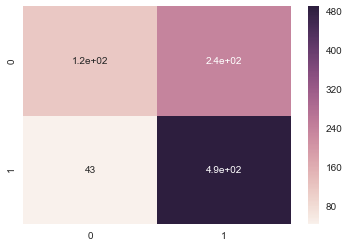

In [69]:
sn.heatmap(df_cm, annot=True)

In [34]:
data=X
X['profit']=y
X.head()
#data=imdb.loc[:,['content_rating','adj_budget','duration','dir_adj_av_gross','profit']]

,content_rating,adj_budget,duration,dir_adj_av_gross,profit
0,3,0.763487,178.0,0.146950,1
1,3,1.000000,169.0,0.073464,1
2,3,0.752572,164.0,0.081551,1
3,3,0.793814,132.0,0.088718,0
4,3,0.859999,156.0,0.071764,1


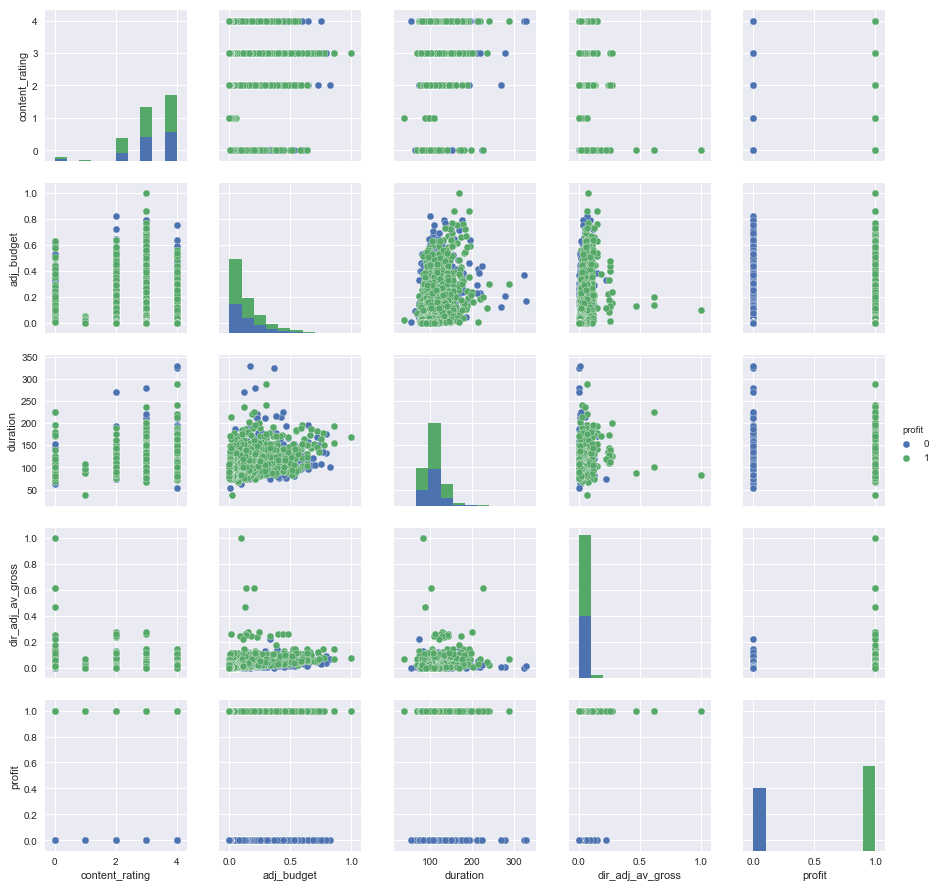

In [35]:
sn.pairplot(X, hue='profit')